# What is Symbolic Computation?

"Symbolic computation deals with the computation of mathematical objects symbolically. This means that the mathematical objects are represented exactly, not approximately, and mathematical expressions with unevaluated variables are left in symbolic form."

First, lets import the math module and the sympy library:

In [1]:
import math
import sympy

Using the standard math module to evaluate $\sqrt{8}$ (irrational), we get an approximate answer:

In [2]:
math.sqrt(8)

2.8284271247461903

Using SymPy however, we get an exact answer:

In [3]:
sympy.sqrt(8)

2*sqrt(2)

### Expressions
Symbolic computation systes, like SymPy, are capable of computing symbolic expression with variables:

In [4]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y           # Just like ordinary python variables, but they dont
                         # evaluate to anything

In [5]:
expr

x + 2*y

In [6]:
expr - 1

x + 2*y - 1

In [7]:
expr - x

2*y

Notice in the above example that it hasn't displayed x + 2*y - x. Expressions are simplified according to certain rules

In [8]:
x*expr

x*(x + 2*y)

Here it hasn't been displayed as $x^2$ + 2*x*y. Sometimes there are cases when the factorised version is easier to work with and other cases when it isnt:

In [9]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
expanded_expr

x**2 + 2*x*y

In [10]:
factor(expanded_expr)

x*(x + 2*y)

## The Power of Symbolic Computation

"The real power of a symbolic computation system such as SymPy is the ability to do all sorts of computations symbolically. SymPy can simplify expressions, compute derivatives, integrals, and limits, solve equations, work with matrices, and much, much more, and do it all symbolically. It includes modules for plotting, printing (like 2D pretty printed output of math formulas, or LATEX), code generation, physics, statistics, combinatorics, number theory, geometry, logic, and more. Here is a small sampling of the sort of symbolic power SymPy is capable of, to whet your appetite."

In [11]:
from sympy import *         # import everything
x, t, z, nu = symbols('x t z nu')

This will make the following expamples pretty print with unicode characters.

Unicode: 'an international encoding standard for use with different languages and scripts, by which each letter, digit, or symbol is assigned a unique    numeric value that applies across different platforms and programs.'

In [12]:
init_printing(use_unicode=True)

In [13]:
diff( sin(x) * exp(x) , x)    # differentiate sin(x)*exp(x) w.r.t x

Compute $\int(e^xsin(x)+e^xcos(x))dx$

In [14]:
integrate(exp(x)*sin(x)+ exp(x)*cos(x), x)

Compute $\int_{-\infty}^{\infty}sin(x^2)dx$

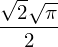

In [15]:
integrate(sin(x**2), (x, -oo, oo))

## Gotchas

Gotchas: _definition_ : 'a gotcha is a valid construct in a system, program or programming language that works as documented but is counter-intuitive and almost invites mistakes because it is both easy to invoke and unexpected or unreasonable in its outcome.' - Essentially, computers do what you tell them to, and sometimes it is easy to think you are telling them to do one thing, when really you are telling them to do another. These easy mistakes to make are called gotchas. 

Sympy is just a Python library, like Numpy. It doesn't add anything to the language, so Python's limitations are Sympy's limitations. Sympy uses Python syntax to build expressions. For example, implicit multiplication is not allowed i.e. 3*x rather than 3x

In [6]:
from sympy import *

In [8]:
h + 1

NameError: name 'h' is not defined

In Python, variables have no meaning until they are defined

In [9]:
h = symbols('h')
h + t 

symbols takes a string of variable names separated by spaces or commas, and creates Symbols out of them. We can then assign these to variable names.

In [10]:
x, y, z = symbols('x y z')

Above will be used for the rest of this section. Below illustrates how the name of a Symbol and the name of the variable it is assigned to need not have anything to do with one another. 

In [15]:
a, b = symbols('b a')
crazy = symbols('unrelated')
a

In [16]:
b

In [17]:
crazy + 1

To make the difference between Python variables and SymPy Symbols very clear:

In [18]:
x = symbols('x')
expr = x + 1
x = 2 
print(expr)

x + 1


Note the answer is not 3! defining the python variable x as 2 has no effect since expr is defined in terms of the the SymPy Symbol 'x'. We changed x after defining expr, which means it is unaltered. See below for another example.

In [19]:
x = 'abc'
expr = x + 'def'
expr

'abcdef'

In [20]:
x = 'ABC'
expr

'abcdef'

If we did want to know what expr is with the new value of x, it is super easy to do with symbolic computation, because we can build a symbolic representation of expr and then just substitute x values. 

In [21]:
x = symbols('x')
expr = x + 1 
expr.subs(x, 2)

Woohay!

'Another very important consequence of the fact that SymPy does not extend Python syntax is that = does not represent equality in SymPy. Rather it is Python variable assignment. This is hard-coded into the Python language, and SymPy makes no attempts to change that.

You may think, however, that ==, which is used for equality testing in Python, is used for SymPy as equality. This is not quite correct either. Let us see what happens when we use ==.'

In [22]:
x + 1 == 4

False

It hasn't treated the above expression symbolically. In SymPy, -- represents exact structural equality testing. 'This means that a == b means that we are asking if a=b. We always get a bool as the result of ==. There is a separate object, called Eq, which can be used to create symbolic equalities'

In [23]:
Eq(x + 1, 4)

Noteworthy example:

In [24]:
(x + 1)**2 == x**2 + 2*x + 1

False

Not structurally equivalent! If we did want to know if they are mathematically equivlent:

In [25]:
a = (x + 1)**2
b = x**2 + 2*x + 1
simplify(a - b)

Also a method called euqals that tests if two expressions are equal by evaluating them numerically at random points. 

In [26]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

### ^ and /
Note: like Python, sympy uses $**$ for exponentiation instead of ^. Like in Python, ^ represents logical exclusive or. 


In [27]:
True ^ False

True

In [28]:
True ^ True

False

In [29]:
x^y

Final technical discussion. x + 1 is a SymPy symbol added to a Python int. SymPy tells Python tht Sympy objects know how to be added to Python ints, and so 1 is converted to the SymPy integer object. 
Most of the time this happens automatically behind the scenes. However:
SymPy object + SymPy object = SymPy object
SymPy object + Python object = SymPy object
Python object + Python object = Python object

In [30]:
type(Integer(1) +1)

sympy.core.numbers.Integer

In [31]:
type(1 + 1)

int

Can cause a problem when it comes to division. In SymPy the division of 2 numbers gives a rational:

In [32]:
Integer(1)/Integer(3)

In [33]:
type(Integer(1)/Integer(3))

sympy.core.numbers.Rational

In Python / represents either integer division or floating point division (working with Python 2 here, so integer division), unless you run $from __future__ import division$.

In [34]:
1/2 

In [35]:
from __future__ import division
1/2 

In [36]:
type(1/2)

float

In [38]:
Rational(1, 2)

so if we are writing an expression where there is int/int:

In [39]:
x + 1/2

Python evaluates 1/2 to 0.5 then it is cast into a SymPy type when it is added to x. Can avoid by explicitly creating a Rational:

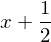

In [40]:
x + Rational(1, 2)

# Solvers

I think this is likely the most relevant facet of sympy for my project

Here we go:

Quick Note: Any expression that is not an Eq is assumed equal to zero by the solving functions (solve and solveset):

In [20]:
Eq(x, y)

In [16]:
solve(Eq(x**2, 1), x)

In [17]:
solve(Eq(x**2 - 1, 0), x)

In [19]:
solve(x**2 - 1, x)

## Solving Equations Algebraically

Main function to consider is solve(equations, variables). As shown above, equations may be in the form of Eq or expressions assumed equal to zero. When solving a single equation, output of solve is a list of the solutions.

__However__, the newer version of SymPy (which has just been installed) has an improved version, called solveset. The syntax for solveset is solveset(equations, variable=None, domain=S.Complexes). When solving a single equation, the output of solveset is a FiniteSet or an Interval or ImageSet of the solutions. 

In [22]:
solveset(x**2 - x, x)

In [24]:
solveset(x - x, x, domain=S.Reals)

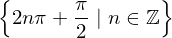

In [28]:
solveset(sin(x) - 1, x, domain=S.Reals)

In [29]:
solve(sin(x) - 1, x)

## solve vs solveset

With __solve__, if no solutions are found, NotImplementedError is raised or an empty list returned.

In [46]:
solve(exp(x), x)

This doesn't necessarily mean there are no solutions- it just hasn't found any. This could be the case for 2 reasons.

1. Solution can't be represented symbolically 
2. solve is heuristics, may find some solutions, but not all.

Heuristics: _definition_: technique designed for solving a problem more quickly when classic methods are too slow, or finding an approximate solution when classic methods fail to find any exact solution.

Example: cos(x) = x has a solution but it can;t be repsented symbolically. 

In [26]:
solve(cos(x) - x, x)    # transcendental equation

NotImplementedError: multiple generators [x, cos(x)]
No algorithms are implemented to solve equation -x + cos(x)

However, With __solveset__, and EmptySet is returned and if it is not able to find solutions then a ConditionSet is returned.

In [30]:
solveset(exp(x), x)

In [31]:
solveset(cos(x) - x, x)

In short, solveset is better, so __from now on we will only consider solveset__.

In solveset module, the linear system of equations is solved using linsolve. 

-  List of Equations Form:

In [35]:
linsolve([x + y + z - 1, x + y + 2*z - 3], (x, y, z))

-  Augmented Matrix Form:

In [36]:
linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

-  A*x = b form

In [37]:
M = Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
linsolve(system, x, y, z)

solveset reports each solution only once. To get the solutions of a polynomial including multiplicity use roots.

In [39]:
solveset(x**3 - 6*x**2 + 9*x, x)

In [40]:
roots(x**3 - 6*x**2 + 9*x, x)

zero is a root of multiplicity 1, 3 is a root of multiplicity 2.

With this version of SymPy (1.0), solveset is not capable of solving:
-  Non-linear multivariate system
-  Equations solvable by LambertW(Transcendental equation solver).

Can use solve instead.

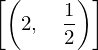

In [42]:
solve([x*y - 1, x -2], x, y)

In [44]:
solve(x*exp(x) -1, x)

## Solving Differential Equations

Use dsolve. Create undefined functions by passing cls=Function to the symbols function.

In [46]:
f, g = symbols('f g', cls=Function)

In [47]:
f(x)

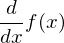

In [48]:
f(x).diff(x)

Representing $f^{''}(x) - 2f^{'}(x) + f(x) = sin(x)$

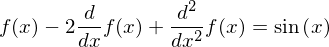

In [52]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

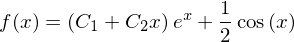

In [54]:
dsolve(diffeq, f(x))

In [55]:
dsolve(f(x).diff(x)*(1 - sin(f(x))), f(x))